# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models.
This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to
 visualize these features. At the end of the notebook, we prepare clean data sets,
 which will be stored in the `data/` folder.

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs.
For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance,
returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data,
I'll first get the data and clear the name to get an appropiate object.

In [1]:
# You need to install quandl and an apikey for this. Only uncomment if you have it 
# %pip install yfinance quandl

In [2]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# import cufflinks as cf


In [3]:
ma_values = [4,50,80]
rsi_values = {
    'k': 3,
    'd': 3,
    'alpha':14
}

In [4]:
## Let's deal first with the ticker name, this is useful for interpretation

ticker_list = [
#             'SPY',
           '^GSPC',
           '^IXIC', 
           'GC=F', 
           'SI=F',
           'CL=F', 
           '^TNX',
           'BTC-USD',
           '^N225',
           '^ftse', 
           'EURUSD=X',
           '000001.SS', 
           '^HSI',
            ]

signs = ['=','^','-','.']


def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'gspc':
        x = 'spy'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusd':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in ticker_list]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


gspc = spy
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusd = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [5]:
ticker_concat = " ".join(ticker_list)
ohlcv = yf.download(ticker_concat, start="2008-01-01", threads=False)
tickers = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


In [6]:
ohlcv.tail()

Adj Close                                                  \
              000001.SS       BTC-USD       CL=F  EURUSD=X         GC=F   
Date                                                                      
2022-01-17  3541.669922  42250.550781        NaN  1.141070          NaN   
2022-01-18  3569.909912  42375.632812  85.430000  1.141057  1812.300049   
2022-01-19  3558.179932  41744.328125  86.959999  1.132965  1843.099976   
2022-01-20  3555.060059  40680.417969  86.900002  1.134340  1842.500000   
2022-01-21  3522.567871  38973.035156  84.169998  1.134173  1834.300049   

                                                                          \
              SI=F        ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                                       
2022-01-17     NaN  7611.200195          NaN  24218.029297           NaN   
2022-01-18  23.487  7563.600098  4577.109863  24112.779297  14506.900391   
2022-01-19  24.226  7589.700195  4532.759766  24127.849609  14340.259766   
2022-01-20  24.711  7585.000000  4482.729980  24952.349609  14154.019531   
2022-01-21  24.500  7532.060059          NaN  24965.550781           NaN   

                                       Close                           \
                   ^N225   ^TNX    000001.SS       BTC-USD       CL=F   
Date                                                                    
2022-01-17  28333.519531    NaN  3541.669922  42250.550781        NaN   
2022-01-18  28257.250000  1.865  3569.909912  42375.632812  85.430000   
2022-01-19  27467.230469  1.827  3558.179932  41744.328125  86.959999   
2022-01-20  27772.929688  1.833  3555.060059  40680.417969  86.900002   
2022-01-21  27522.259766    NaN  3522.567871  38973.035156  84.169998   

                                                                     \
            EURUSD=X         GC=F    SI=F        ^FTSE        ^GSPC   
Date                                                                  
2022-01-17  1.141070          NaN     NaN  7611.200195          NaN   
2022-01-18  1.141057  1812.300049  23.487  7563.600098  4577.109863   
2022-01-19  1.132965  1843.099976  24.226  7589.700195  4532.759766   
2022-01-20  1.134340  1842.500000  24.711  7585.000000  4482.729980   
2022-01-21  1.134173  1834.300049  24.500  7532.060059          NaN   

                                                                    High  \
                    ^HSI         ^IXIC         ^N225   ^TNX    000001.SS   
Date                                                                       
2022-01-17  24218.029297           NaN  28333.519531    NaN  3546.090088   
2022-01-18  24112.779297  14506.900391  28257.250000  1.865  3579.310059   
2022-01-19  24127.849609  14340.259766  27467.230469  1.827  3578.729980   
2022-01-20  24952.349609  14154.019531  27772.929688  1.833  3576.260010   
2022-01-21  24965.550781           NaN  27522.259766    NaN  3547.000244   

                                                                       \
                 BTC-USD       CL=F  EURUSD=X         GC=F       SI=F   
Date                                                                    
2022-01-17  43179.390625        NaN  1.143458          NaN        NaN   
2022-01-18  42534.402344  86.629997  1.142335  1820.099976  23.487000   
2022-01-19  42478.304688  87.910004  1.135680  1843.099976  24.226000   
2022-01-20  43413.023438  87.820000  1.136893  1843.000000  24.711000   
2022-01-21  41057.542969  87.820000  1.134816  1843.099976  24.620001   

                                                                  \
                  ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                               
2022-01-17  7616.100098          NaN  24408.880859           NaN   
2022-01-18  7613.100098  4632.240234  24385.050781  14740.540039   
2022-01-19  7614.899902  4611.549805  24286.140625  14658.889648   
2022-01-20  7619.000000  4602.109863  24952.3496

In [7]:
tickers.head()

000001.SS                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2007-12-31          NaN          NaN          NaN          NaN          NaN   
2008-01-01          NaN          NaN          NaN          NaN          NaN   
2008-01-02  5265.000000  5295.016113  5201.892090  5272.813965  5272.813965   
2008-01-03  5269.800781  5321.457031  5211.045898  5319.860840  5319.860840   
2008-01-04  5328.411133  5372.460938  5318.460938  5361.574219  5361.574219   

                      ^TNX                                        \
             Volume   Open   High    Low  Close Adj Close Volume   
Date                                                               
2007-12-31      NaN  4.040  4.058  4.014  4.035     4.035    0.0   
2008-01-01      NaN    NaN    NaN    NaN    NaN       NaN    NaN   
2008-01-02  76600.0  4.033  4.052  3.892  3.901     3.901    0.0   
2008-01-03  98600.0  3.892  3.958  3.892  3.901     3.901    0.0   
2008-01-04  80800.0  3.914  3.990  3.809  3.854     3.854    0.0   

                   ^N225                                            \
                    Open          High           Low         Close   
Date                                                                 
2007-12-31           NaN           NaN           NaN           NaN   
2008-01-01           NaN           NaN           NaN           NaN   
2008-01-02           NaN           NaN           NaN           NaN   
2008-01-03           NaN           NaN           NaN           NaN   
2008-01-04  15155.730469  15156.660156  14542.580078  14691.410156   

                                      EURUSD=X                                \
               Adj Close      Volume      Open      High       Low     Close   
Date                                                                           
2007-12-31           NaN         NaN  1.473709  1.474992  1.457301  1.460110   
2008-01-01           NaN         NaN  1.460110  1.462994  1.458194  1.462010   
2008-01-02           NaN         NaN  1.462309  1.474296  1.460110  1.471692   
2008-01-03           NaN         NaN  1.471692  1.477891  1.469400  1.474491   
2008-01-04  14691.410156  98700000.0  1.474709  1.481811  1.469896  1.475492   

                                  CL=F                                    \
           Adj Close Volume       Open        High        Low      Close   
Date                                                                       
2007-12-31  1.460110    0.0  96.120003   96.779999  94.730003  95.980003   
2008-01-01  1.462010    0.0        NaN         NaN        NaN        NaN   
2008-01-02  1.471692    0.0  96.050003  100.000000  96.050003  99.620003   
2008-01-03  1.474491    0.0  99.230003  100.089996  98.449997  99.180000   
2008-01-04  1.475492    0.0  99.169998   99.410004  97.099998  97.910004   

                                       ^FTSE                            \
            Adj Close    Volume         Open         High          Low   
Date                                                                     
2007-12-31  95.980003  108597.0  6476.899902  6480.200195  6432.799805   
2008-01-01        NaN       NaN          NaN          NaN          NaN   
2008-01-02  99.620003  227099.0  6456.899902  6512.299805  6402.600098   
2008-01-03  99.180000  241269.0  6416.700195  6487.799805  6394.600098   
2008-01-04  97.910004  231790.0  6479.399902  6534.700195  6333.200195   

                                                          ^IXIC               \
                  Close    Adj Close        Volume         Open         High   
Date                                                                           
2007-12-31  6456.899902  6456.899902  1.939165e+08  2663.780029  2668.610107   
2008-01-01          NaN          NaN           NaN          NaN          NaN   
2008-01-02  6416.700195  6416.70

In [8]:
# Renaming columns to changed labels
for x in [ohlcv, tickers]:
    x.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
    x[x.index.min():]

# ohlcv.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
# tickers.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
# ohlcv[ohlcv.index.min():]
# tickers[ohlcv.index.min():]

open = ohlcv['open'].fillna(method='ffill')
high = ohlcv['high'].fillna(method='ffill')
low = ohlcv['low'].fillna(method='ffill')
close = ohlcv['close'].fillna(method='ffill')
volume = ohlcv['volume'].fillna(method='ffill')

In [9]:
ohlcv.columns

MultiIndex([('adj close',   'shangai'),
            ('adj close',       'btc'),
            ('adj close', 'crude oil'),
            ('adj close',      'euro'),
            ('adj close',      'gold'),
            ('adj close',    'silver'),
            ('adj close',      'ftse'),
            ('adj close',       'spy'),
            ('adj close',       'hsi'),
            ('adj close',    'nasdaq'),
            ('adj close',    'nikkei'),
            ('adj close',     'rates'),
            (    'close',   'shangai'),
            (    'close',       'btc'),
            (    'close', 'crude oil'),
            (    'close',      'euro'),
            (    'close',      'gold'),
            (    'close',    'silver'),
            (    'close',      'ftse'),
            (    'close',       'spy'),
            (    'close',       'hsi'),
            (    'close',    'nasdaq'),
            (    'close',    'nikkei'),
            (    'close',     'rates'),
            (     'high',   'shangai'),


## Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base.
For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks
with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them
 to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

<AxesSubplot:title={'center':'Returns, excluding BTC [$]'}, xlabel='Date'>

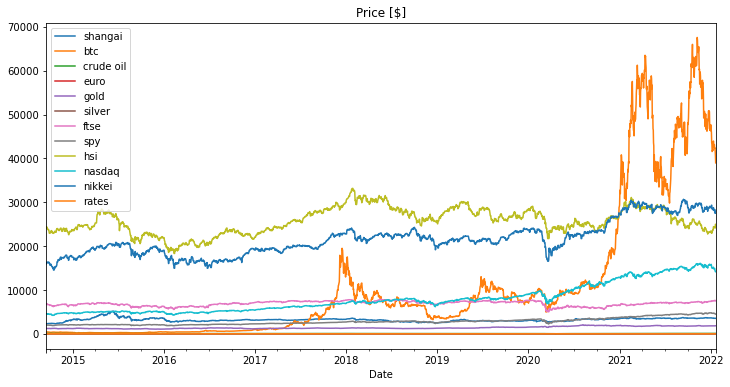

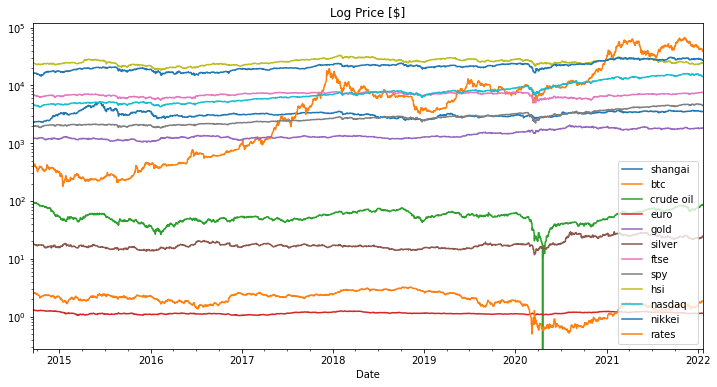

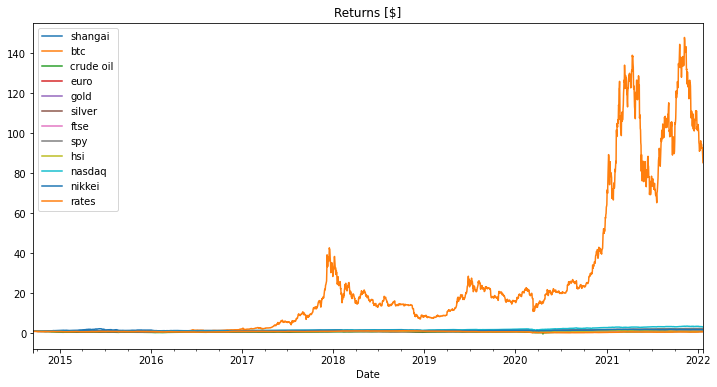

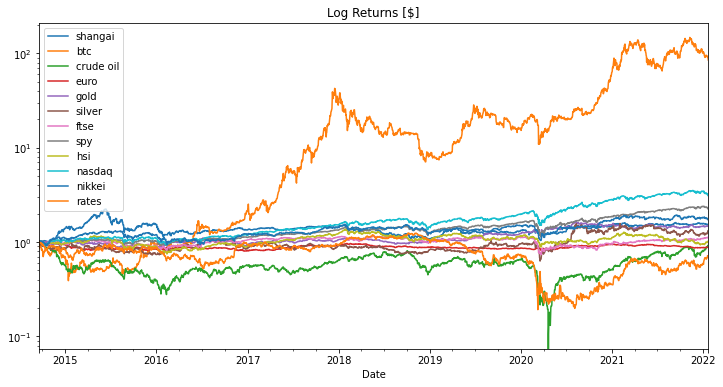

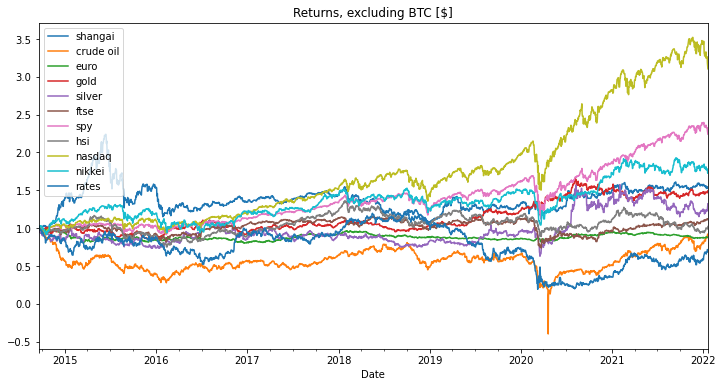

In [10]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()

close.plot(figsize=(12,6),label='Price', title='Price [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log Price [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log Returns [$]')

cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Returns, excluding BTC [$]')

Even by using returns as the base metric, we can see that we needed to plot them in a logarithmic scale,
for their changes to be made comparable with Bitcoin, given the astonishing returns on the asset since 2010.

## Performing technical analysis calculations

Now we will calculate several indicators typically used in technical analysis of stock prices,
such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a.
the expanding standard deviation of Bitcoin price.

### Moving Averages

In [11]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['close'].rolling(ma3).mean(),0)    
    return data

### (Stochastic) Relative Strenght Index

In [12]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=80):
    df['btc_std_dev'] = df['change'].expanding(2).std()
    df['btc_mean'] = df['change'].expanding(2).mean()
    # df['conf_int_p'] = np.percentile(df['change'], (100-confidence)/2)
    # df['conf_int_m'] = np.percentile(df['change'], confidence + (100-confidence)/2)
    df['std_dif'] = (df['close'] - df['btc_std_dev']).abs()

    return df

In [13]:
tickers.columns

MultiIndex([(  'shangai',      'open'),
            (  'shangai',      'high'),
            (  'shangai',       'low'),
            (  'shangai',     'close'),
            (  'shangai', 'adj close'),
            (  'shangai',    'volume'),
            (    'rates',      'open'),
            (    'rates',      'high'),
            (    'rates',       'low'),
            (    'rates',     'close'),
            (    'rates', 'adj close'),
            (    'rates',    'volume'),
            (   'nikkei',      'open'),
            (   'nikkei',      'high'),
            (   'nikkei',       'low'),
            (   'nikkei',     'close'),
            (   'nikkei', 'adj close'),
            (   'nikkei',    'volume'),
            (     'euro',      'open'),
            (     'euro',      'high'),
            (     'euro',       'low'),
            (     'euro',     'close'),
            (     'euro', 'adj close'),
            (     'euro',    'volume'),
            ('crude oil',      'open'),


In [14]:
## Here we start doing technical indicators for our target instrument

# btc = yf.Ticker('BTC-USD')
# btc = btc.history(start="2008-01-01")

# btc = tickers['BTCUSD=X']
# btc.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
# btc = btc[btc.ohlcv.notnull()]

btc = tickers.btc
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.tail()

/var/folders/l4/4bv0qnl51_xdknpb_7gf8jc00000gn/T/ipykernel_57482/686549192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'+str(ma1)] = round(data['close'].rolling(ma1).mean(),0)
/var/folders/l4/4bv0qnl51_xdknpb_7gf8jc00000gn/T/ipykernel_57482/686549192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'+str(ma2)] = round(data['close'].rolling(ma2).mean(),0)
/var/folders/l4/4bv0qnl51_xdknpb_7gf8jc00000gn/T/ipykernel_57482/686549192.py:4: SettingWithCopyWarning: 
A value is trying to b

,open,high,low,close,adj close,volume,MA4,MA50,MA80,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-17,43118.121094,43179.390625,41680.320312,42250.550781,42250.550781,2.169090e+10,42910.0,47681.0,52638.0,-0.020024,92.384449,0.00000,0.020024,0.005694,0.009827,0.579356,36.683055,18.789626,48.980272,59.268123,76.75,80.28,84.94,82.58,0.038867,0.002453,42250.511914
2022-01-18,42250.074219,42534.402344,41392.214844,42375.632812,42375.632812,2.241721e+10,42729.0,47372.0,52394.0,0.002960,92.657951,0.00296,0.000000,0.005329,0.008517,0.625702,38.488105,18.789626,48.980272,65.246963,69.68,77.12,76.75,80.28,0.038860,0.002454,42375.593953
2022-01-19,42374.039062,42478.304688,41242.914062,41744.328125,41744.328125,2.309154e+10,42371.0,47067.0,52150.0,-0.014898,91.277549,0.00000,0.014898,0.004619,0.009368,0.493027,33.021968,18.789626,48.980272,47.141563,57.22,67.88,69.68,77.12,0.038854,0.002447,41744.289271
2022-01-20,41744.027344,43413.023438,40672.824219,40680.417969,40680.417969,2.038203e+10,41763.0,46736.0,51896.0,-0.025486,88.951219,0.00000,0.025486,0.004003,0.011517,0.347555,25.791543,18.789626,48.980272,23.192338,45.19,57.36,57.22,67.88,0.038851,0.002437,40680.379118
2022-01-21,40640.226562,41057.542969,38592.312500,38973.035156,38973.035156,3.680170e+10,40943.0,46386.0,51593.0,-0.041971,85.217880,0.00000,0.041971,0.003469,0.015577,0.222699,18.213707,18.213707,48.980272,0.000000,23.44,41.95,45.19,57.36,0.038853,0.002420,38972.996303


### Let's have a look at volume figures to see if it makes sense to add to the model

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>],
       [<AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>],
       [<AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>]], dtype=object)

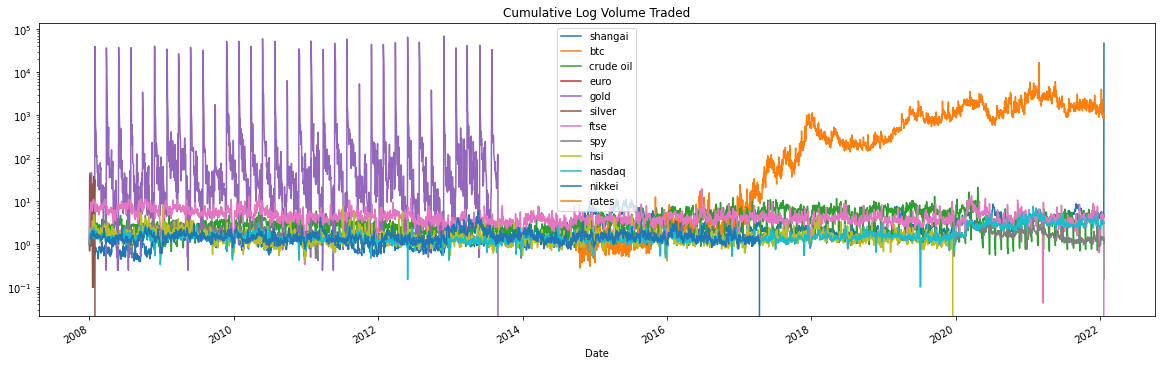

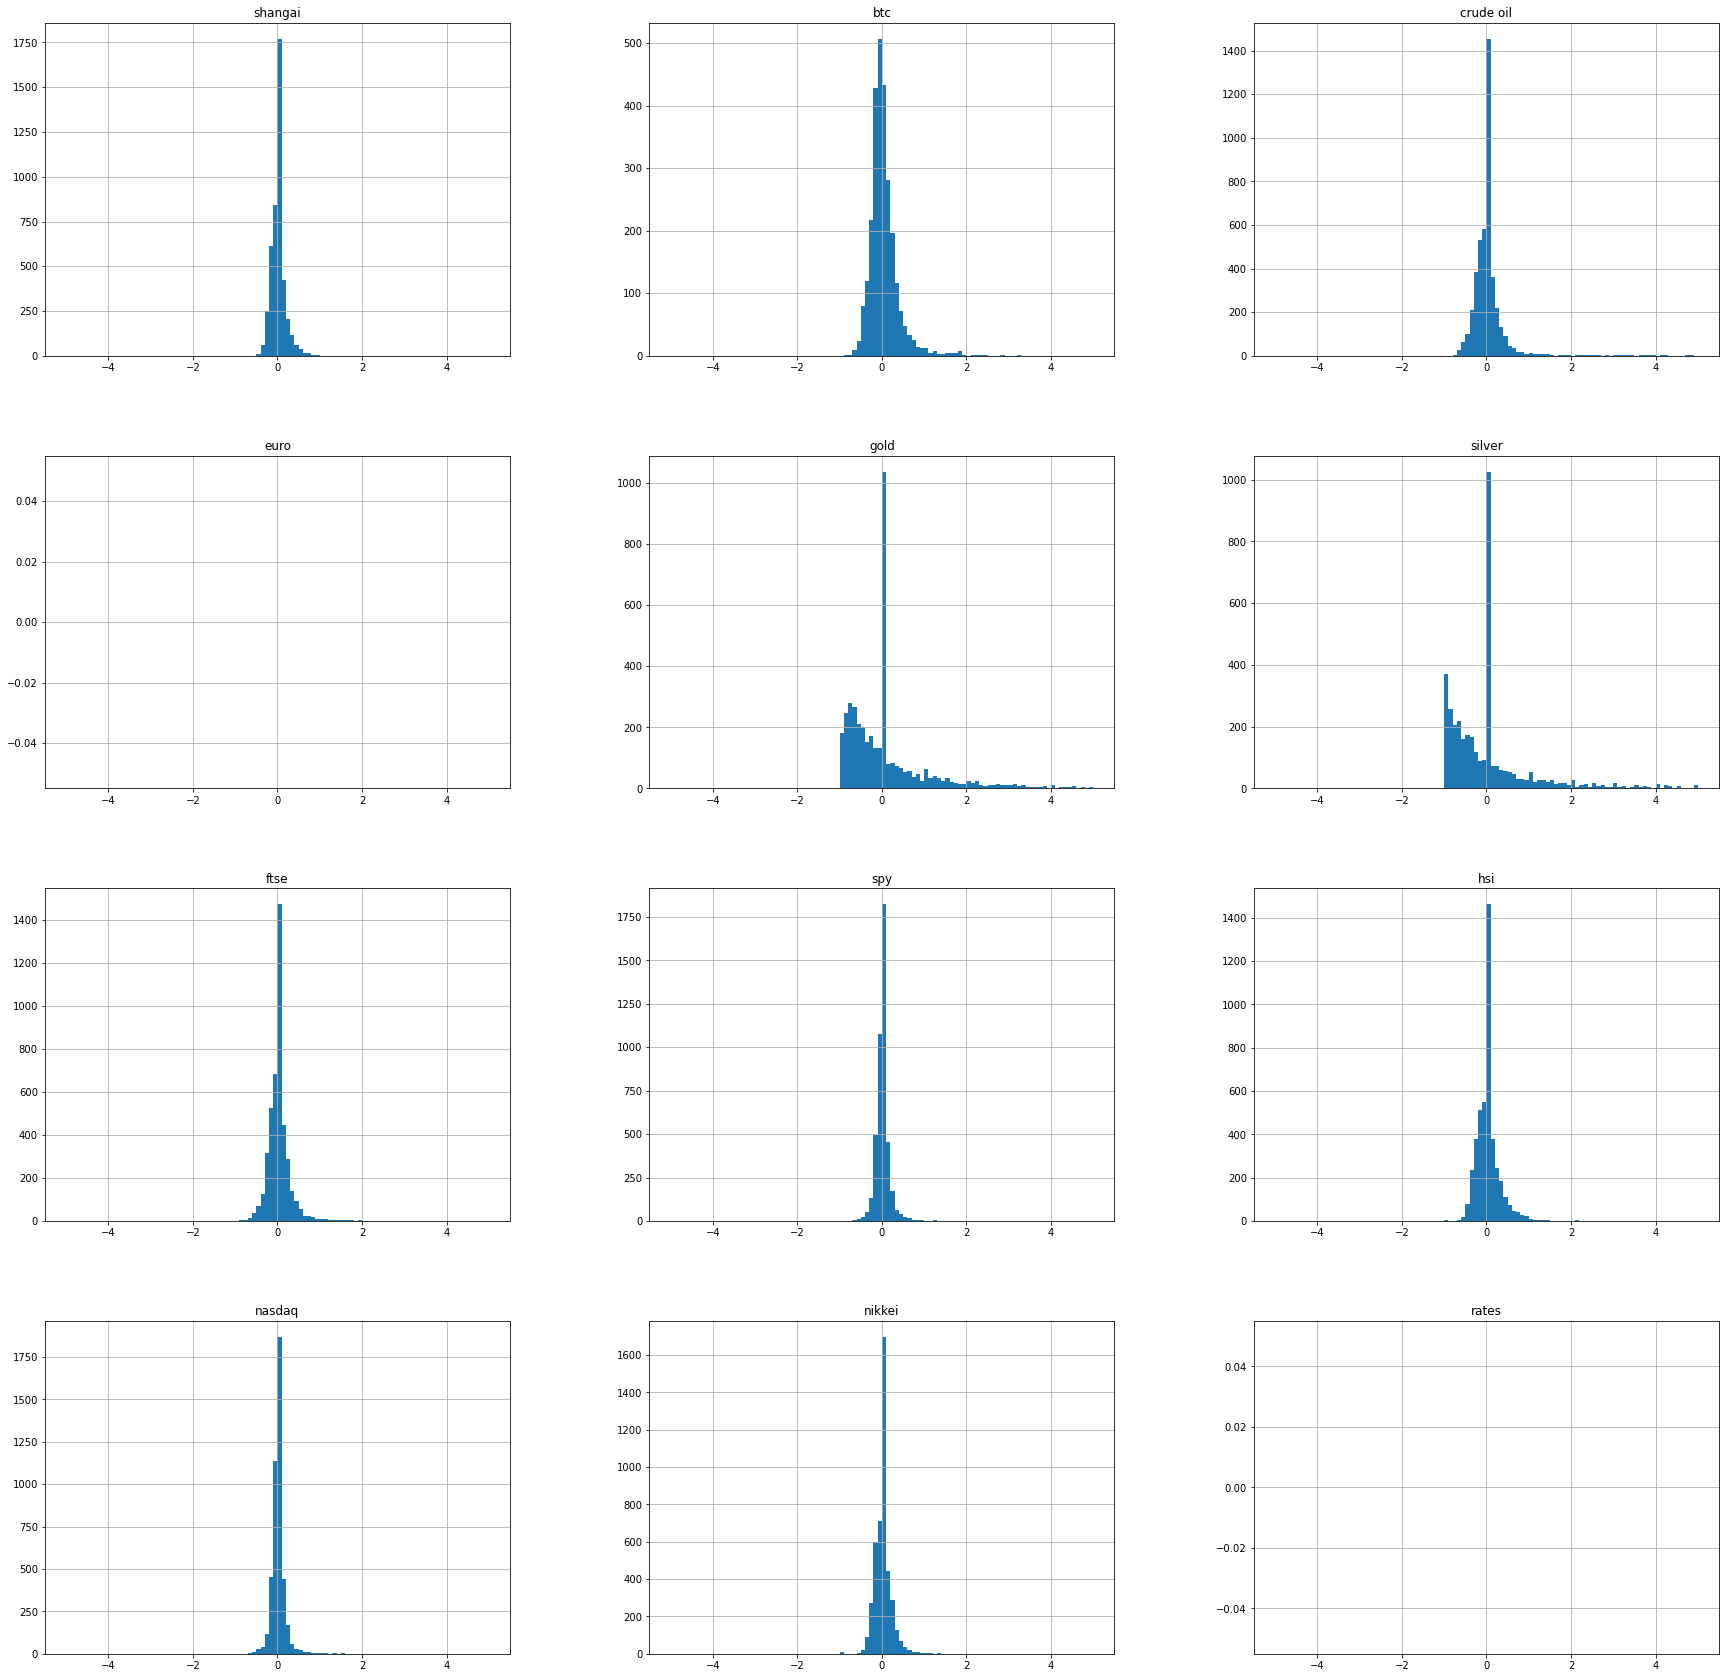

In [15]:
# volume.plot(logy=True, figsize=(20,6))
v_returns = volume.pct_change(1)
v_cumulative = (1+v_returns).cumprod()
v_cumulative.plot(logy=True, figsize=(20,6), title="Cumulative Log Volume Traded")
v_returns.hist(bins=100, figsize=(30,30), range=[-5, 5])

We will include some of these later, but we'll need to drop a couple columns

In [16]:
volume.drop(columns=['rates', 'euro'], inplace=True)
volume.columns

Index(['shangai', 'btc', 'crude oil', 'gold', 'silver', 'ftse', 'spy', 'hsi',
       'nasdaq', 'nikkei'],
      dtype='object')

In [17]:
btc.describe()

,open,high,low,close,adj close,volume,MA4,MA50,MA80,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03,2680.000000,2634.000000,2604.000000,2682.000000,2682.000000,4435.000000,4435.000000,4435.000000,4435.000000,2682.000000,2682.000000,2669.000000,2669.000000,2669.000000,2667.000000,2665.000000,2666.000000,2664.000000,2681.000000,2681.000000,2681.000000
mean,10989.900302,11287.127044,10662.825102,11003.371682,11003.371682,1.459104e+10,10992.121269,10785.541002,10607.274194,0.002443,24.068413,0.008487,0.007010,0.008481,0.006996,1.964972,55.155458,37.721288,71.516129,52.186609,52.187559,52.193268,52.188417,52.190739,0.037494,0.001324,11011.213699
std,15902.616531,16332.915184,15407.804148,15907.755854,15907.755854,2.008396e+10,15887.008198,15504.323948,15123.440174,0.038847,34.787306,0.020548,0.019305,0.009717,0.008612,2.978897,17.845420,15.551682,14.146841,35.156215,31.634422,30.159257,31.640325,30.164637,0.003096,0.002797,15911.071482
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,199.000000,232.000000,234.000000,-0.371695,0.389437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.604388,0.000000,0.000000,0.000000,0.000000,0.000000,0.001473,-0.070884,178.061070
25%,601.778015,606.707001,596.048004,602.733490,602.733490,7.839140e+07,604.000000,610.000000,615.000000,-0.013134,1.319197,0.000000,0.000000,0.000000,0.000000,0.736064,42.398435,26.264281,60.912418,20.529553,23.625000,24.560000,23.622500,24.550000,0.035384,0.000934,604.695350
50%,6235.029785,6371.549805,6093.669922,6238.049805,6238.049805,4.999240e+09,6283.000000,6491.000000,6408.500000,0.001976,13.644561,0.000000,0.000000,0.006009,0.004322,1.185242,54.238478,37.225195,71.593085,52.127348,52.600000,52.320000,52.610000,52.275000,0.038682,0.002220,6242.154374
75%,10316.638184,10495.605957,10067.539062,10317.936035,10317.936035,2.445092e+10,10306.250000,10332.250000,10167.250000,0.018267,22.567414,0.006149,0.002222,0.013918,0.011154,2.154156,68.295802,48.531416,83.326307,85.731654,81.810000,80.340000,81.815000,80.345000,0.039162,0.002580,10323.717057
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,66121.000000,60802.000000,56971.000000,0.252472,147.740658,0.252472,0.371695,0.078900,0.063441,62.372352,98.422025,81.462209,98.422025,100.000000,100.000000,100.000000,100.000000,100.000000,0.061565,0.003865,67566.789052


<AxesSubplot:title={'center':'Standard deviation of daily change'}, xlabel='Date'>

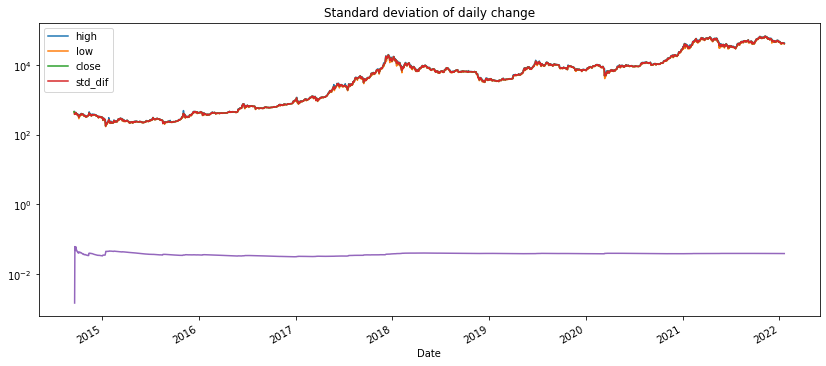

In [18]:
btc[['high','low','close','std_dif']].plot(figsize=(14,6),logy=True, title='Bitcoin Price')
btc[5:]['btc_std_dev'].plot(figsize=(14,6), title='Standard deviation of daily change')

In [20]:
# selection of technical indicators to feed the model
btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

In [21]:
volume.tail()

,shangai,btc,crude oil,gold,silver,ftse,spy,hsi,nasdaq,nikkei
Date,,,,,,,,,,
2022-01-16,3.769000e+05,1.790210e+10,364442.0,816.0,36.0,790074900.0,3.483530e+09,1.840017e+09,4.345780e+09,82100000.0
2022-01-17,3.129000e+05,2.169090e+10,364442.0,816.0,36.0,812336800.0,3.483530e+09,1.633512e+09,4.345780e+09,54500000.0
2022-01-18,3.771000e+05,2.241721e+10,163643.0,900.0,207.0,953228000.0,3.324960e+09,1.638866e+09,5.027990e+09,71300000.0
2022-01-19,3.332000e+05,2.309154e+10,163643.0,900.0,207.0,867104400.0,3.387370e+09,1.729895e+09,4.639990e+09,84300000.0
2022-01-20,3.591246e+09,1.808704e+10,17184.0,227885.0,70707.0,0.0,2.541011e+09,0.000000e+00,4.518765e+09,0.0


In [22]:
volume.rename(columns = lambda x: "vol_" + x, inplace=True)
data = pd.concat([cumulative, btc], axis=1)
data = pd.concat([data, volume], axis=1)


# data.drop(data.index[0], inplace=True)
data.tail()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_shangai,vol_btc,vol_crude oil,vol_gold,vol_silver,vol_ftse,vol_spy,vol_hsi,vol_nasdaq,vol_nikkei
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-16,1.525747,94.272189,0.887736,0.884100,1.471565,1.227616,1.112389,2.329596,1.000283,3.264605,1.770084,0.681538,42996.0,47981.0,52888.0,84.511748,44.304268,0.038872,43113.840034,3.769000e+05,1.790210e+10,364442.0,816.0,36.0,790074900.0,3.483530e+09,1.840017e+09,4.345780e+09,82100000.0
2022-01-17,1.534590,92.384449,0.887736,0.880518,1.471565,1.227616,1.122447,2.329596,0.993503,3.264605,1.783253,0.681538,42910.0,47681.0,52638.0,59.268123,36.683055,0.038867,42250.511914,3.129000e+05,2.169090e+10,364442.0,816.0,36.0,812336800.0,3.483530e+09,1.633512e+09,4.345780e+09,54500000.0
2022-01-18,1.546826,92.657951,0.904787,0.880508,1.468163,1.258479,1.115427,2.286760,0.989185,3.179811,1.778453,0.717308,42729.0,47372.0,52394.0,65.246963,38.488105,0.038860,42375.593953,3.771000e+05,2.241721e+10,163643.0,900.0,207.0,953228000.0,3.324960e+09,1.638866e+09,5.027990e+09,71300000.0
2022-01-19,1.541744,91.277549,0.920991,0.874264,1.493114,1.298076,1.119276,2.264602,0.989803,3.143284,1.728731,0.702692,42371.0,47067.0,52150.0,47.141563,33.021968,0.038854,41744.289271,3.332000e+05,2.309154e+10,163643.0,900.0,207.0,867104400.0,3.387370e+09,1.729895e+09,4.639990e+09,84300000.0
2022-01-20,1.540393,90.458656,0.913895,0.875325,1.490684,1.314097,1.118585,2.239607,1.023627,3.102462,1.747971,0.705000,41935.0,46750.0,51904.0,37.317286,30.055956,0.038847,41369.781465,3.591246e+09,1.808704e+10,17184.0,227885.0,70707.0,0.0,2.541011e+09,0.000000e+00,4.518765e+09,0.0


## Getting fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty,
(daily) number of transactions and cost per transaction.

In [23]:
import quandl
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

# from settings import QUANDLKEY
quandl_key = os.getenv("QUANDLKEY")
quandl.ApiConfig.api_key = quandl_key # (insert if available, else there is a ratelimit)

In [25]:
# print('This is your key!', quandl_key)

In [26]:

# btc mining is an interesting source, but free data has not the same quality ;)
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction
m2 = quandl.get("FED/M2_N_WM")


<AxesSubplot:xlabel='Date'>

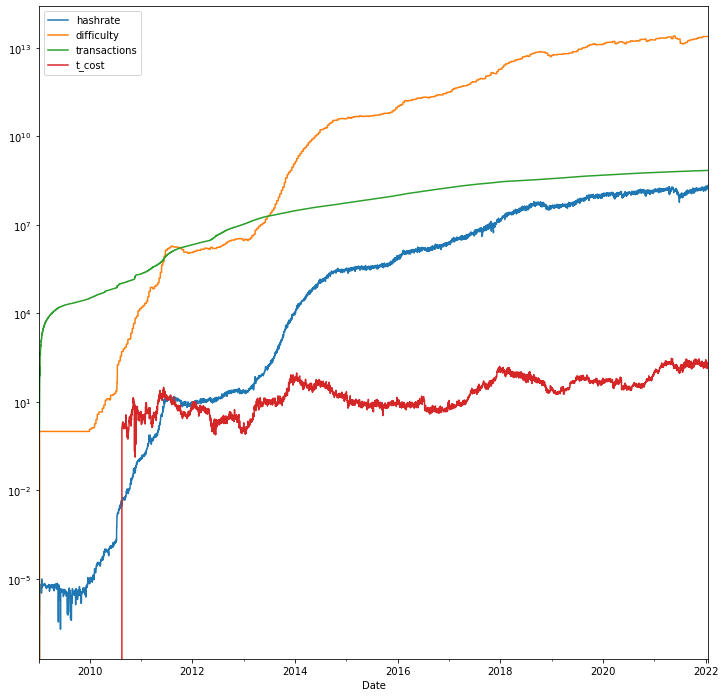

In [27]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1) #, m2]
# fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost'] #, 'm2']
fundamentals.plot(figsize=(12,12), logy=True)

<AxesSubplot:xlabel='Date'>

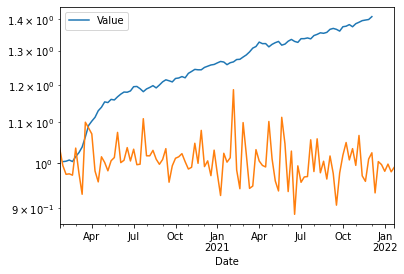

In [28]:
# compare_date = '2014-09-22'
compare_date = '2020-01-21'
m2_returns = m2[compare_date:].pct_change()
m2_cumulative = (1 + m2_returns).cumprod()

# We will already get log cumulatives for later use
m2_log_cumulative = np.log(m2_cumulative)
m2_log_cumulative.plot(label='M2 cumulative growth')

log_cumulative = np.log(cumulative)

(1 + log_cumulative.btc[compare_date:]).plot(label='')

In [29]:
m2.tail()

,Value
Date,
2021-11-08,21342.3
2021-11-15,21422.8
2021-11-22,21452.7
2021-11-29,21479.7
2021-12-06,21624.1


In [31]:
df = pd.concat([data,fundamentals], axis=1)
# df = df[df.btc.notnull()]
df = df[df.index.min():]

## Normalizing functions for dataframes

In order to make sure that no feature becomes more important in the dataset than the others,
we will create functions to normalize these and bring them back to the dataset's original state.
This will be used later before saving the feed-in dataset.

We will aim to normalize specially oscillating factors,

In [ ]:
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Returns, excluding BTC [$]')

In [32]:
def min_max_scaler(df, log=False):
    if log:
        df = np.log(df)
    normalized_df=(df-df.min())/(df.max()-df.min())

    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf, log=False):
    df = ndf*(maxdf-mindf) + mindf
    if log:
        df = np.exp(df)
        
    return df

In [33]:
def standardizer(df, log=False):
    '''
    Returns log normalized and standartized df, mean and standard deviation of raw dataframe
    '''
    if log:
        df = np.log(df)
    ndf = (df-df.mean())/df.std()

    return ndf, df.mean(), df.std()

def back_standardizer(ndf, mean, std, log=False):
    df = ndf*std + mean
    if log:
        df = np.exp(df)
    return df

## Labelling buy, sell and no-trade signals

Following our end-goal, we will need to predict whether prices are going to go up or down.
For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy,
 down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [34]:
returns.btc.describe()

count    2682.000000
mean        0.002443
std         0.038847
min        -0.371695
25%        -0.013134
50%         0.001976
75%         0.018267
max         0.252472
Name: btc, dtype: float64

Given the confidence intervals above, I will take the top 75% interval +2.3% as buy label (1),
-1.36% for the sell label (2), and the values in between as no-trade (0).
The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   2.,   0.,   2.,   1.,   4.,   2.,   1.,   7.,   6.,  13.,
          5.,   9.,   9.,  15.,  18.,  39.,  30.,  33.,  44.,  54.,  78.,
         97., 123., 162., 281., 358., 302., 236., 148., 127.,  91.,  73.,
         67.,  50.,  35.,  24.,  24.,  22.,  13.,   8.,   7.,  16.,   8.,
          7.,   6.,   3.,   3.,   1.,   0.,   2.,   3.,   0.,   0.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.37169539, -0.36545371, -0.35921204, -0.35297037, -0.3467287 ,
        -0.34048703, -0.33424536, -0.32800369, -0.32176202, -0.31552035,
        -0.30927868, -0.30303701, -0.29679534, -0.29055367, -0.28431199,
        -0.27807032, -0.27182865, -0.26558698, -0.25934531, -0.25310364,
        -0.24686197, -0.24

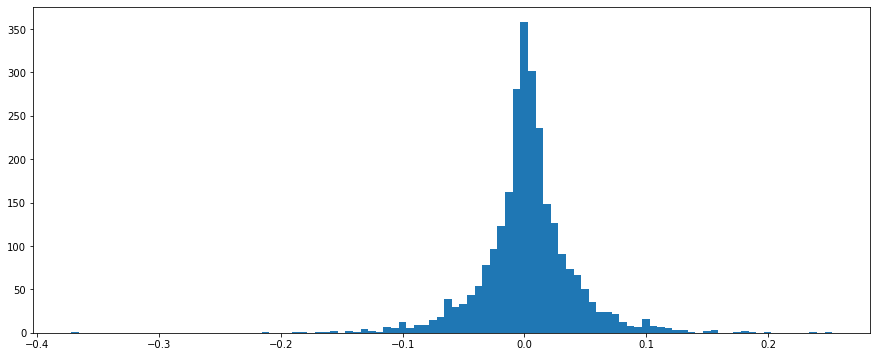

In [39]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=100, label='Distribution of Bitcoin daily returns')

(array([[2682.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [1010.,  262.,  368.,  409.,  143.,   41.,   33.,   16.,    8.,
            3.,    5.,   17.,   36.,   34.,   24.,   27.,   20.,   53.,
           43.,   16.,   30.,   41.,   24.,   13.,    6.],
        [2682.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [2682.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [2682.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0., 

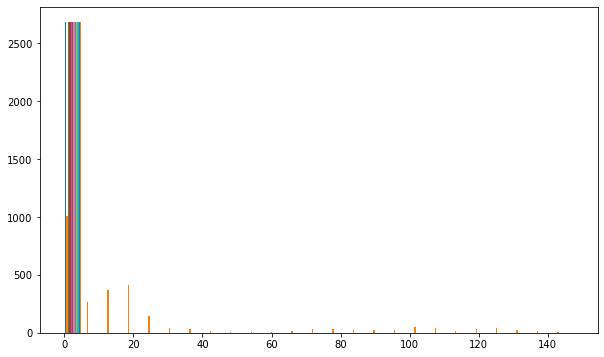

In [66]:
plt.figure(figsize = (10,6))
plt.hist(cumulative, bins=25)

array([[<AxesSubplot:title={'center':'shangai'}>,
        <AxesSubplot:title={'center':'btc'}>,
        <AxesSubplot:title={'center':'crude oil'}>],
       [<AxesSubplot:title={'center':'euro'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'silver'}>],
       [<AxesSubplot:title={'center':'ftse'}>,
        <AxesSubplot:title={'center':'spy'}>,
        <AxesSubplot:title={'center':'hsi'}>],
       [<AxesSubplot:title={'center':'nasdaq'}>,
        <AxesSubplot:title={'center':'nikkei'}>,
        <AxesSubplot:title={'center':'rates'}>]], dtype=object)

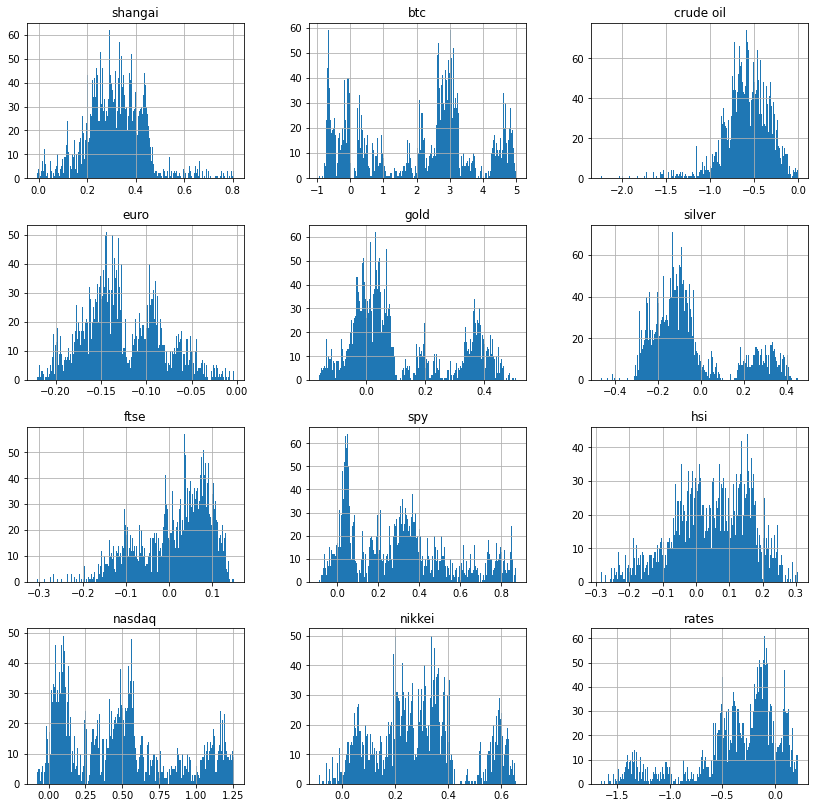

In [65]:
## In this case is when we do something. This also helps compare to other similar instruments
log_cumulative.hist(bins=200, figsize=(14,14))

In [50]:
log_cumulative.columns
log_cumulative.tail()

,shangai,btc,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates
Date,,,,,,,,,,,,
2022-01-16,0.422484,4.546186,-0.119081,-0.123185,0.386327,0.205074,0.106510,0.845695,0.000283,1.183139,0.571027,-0.383403
2022-01-17,0.428263,4.525959,-0.119081,-0.127244,0.386327,0.205074,0.115511,0.845695,-0.006518,1.183139,0.578439,-0.383403
2022-01-18,0.436205,4.528915,-0.100056,-0.127256,0.384012,0.229904,0.109237,0.827136,-0.010874,1.156822,0.575744,-0.332250
2022-01-19,0.432914,4.513905,-0.082305,-0.134373,0.400864,0.260883,0.112682,0.817399,-0.010249,1.145268,0.547387,-0.352836
2022-01-20,0.432038,4.504893,-0.090039,-0.133160,0.399235,0.273150,0.112064,0.806300,0.023352,1.132196,0.558456,-0.349557


### Now we label data

In [53]:
# labels = 0

In [17]:
labels = pd.DataFrame(returns.btc)
labels['returns'] = returns.btc
labels = pd.concat([labels.returns, log_cumulative.btc], axis=1)
labels = pd.concat([labels])
labels.rename(columns={'btc':'btc_close'}, inplace=True)

NameError: name 'log_cumulative' is not defined

In [ ]:
print(labels.columns)
labels.tail()

In [59]:
buy_cond = labels.returns > returns.btc.describe().loc['75%'] # returns.btc.describe()['75%']
sell_cond = labels.returns <  returns.btc.describe().loc['25%'] # -0.013636 # returns.btc.describe()['25%']


In [60]:
labels['c_label'] = 0
labels['c_label'] = labels['c_label'].mask(buy_cond, 1)
labels['c_label'] = labels['c_label'].mask(sell_cond, -1)


# Backtesting, used for later
labels['pnl'] = 0
labels['pnl'] = labels['pnl'].mask(buy_cond, labels.returns)
labels['pnl'] = labels['pnl'].mask(sell_cond, labels.returns)

labels.head()

,returns,btc_close,c_label,bkt_returns
Date,,,,
2014-09-17,NaN,457.334015,0,0.000000
2014-09-18,-0.071926,424.440002,-1,-0.071926
2014-09-19,-0.069843,394.795990,-1,-0.069843
2014-09-20,0.035735,408.903992,1,0.035735
2014-09-21,-0.024659,398.821014,-1,-0.024659


In [61]:
# row data cleaning
df.describe().loc['count'].min()

2682.0

### Data cleaning
I'll consider the minimal available records as starting point and select the training data.
Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [67]:
df = pd.concat([df,labels], axis=1)
df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df = df[-int(df.describe().loc['count'].min()):]
df.describe()

,shangai,btc_cumulative,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_shangai,vol_btc,vol_crude oil,vol_gold,vol_silver,vol_ftse,vol_spy,vol_hsi,vol_nasdaq,vol_nikkei,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2.682000e+03,2.682000e+03,2.682000e+03,2682.000000,2682.000000,2.682000e+03,2.682000e+03,2.682000e+03,2.682000e+03,2.682000e+03,2.681000e+03,2.681000e+03,2.681000e+03,2681.000000,2682.000000,2682.000000,2682.000000,2682.000000
mean,1.381050,24.068413,0.574971,0.882424,1.140891,0.973493,1.017242,1.400446,1.055106,1.737929,1.355575,0.755830,10984.238255,10599.186801,10309.633110,52.243452,55.155458,0.037481,11007.255303,1.592808e+06,1.459647e+10,5.046461e+05,5866.385906,1839.619687,7.971623e+08,3.837824e+09,1.924404e+09,2.718410e+09,1.025253e+08,5.253347e+07,7.255247e+12,3.346139e+08,53.138747,0.002443,11007.303836,0.000000,0.001335
std,0.173277,34.787306,0.138110,0.038370,0.206908,0.203176,0.080164,0.375030,0.119241,0.708801,0.238020,0.247799,15883.703754,15426.817056,15000.761588,35.080336,17.845420,0.003173,15909.424610,6.934032e+07,2.008573e+10,2.226452e+05,32267.071230,10349.897432,2.952401e+08,1.058226e+09,7.081142e+08,1.368543e+09,4.645952e+07,5.745623e+07,7.938713e+12,2.036093e+08,57.666304,0.038847,15909.418143,0.707502,0.038454
min,0.992189,0.389437,-0.398538,0.801791,0.851264,0.628784,0.736466,0.913823,0.751529,0.923605,0.914646,0.191923,199.000000,232.000000,234.000000,0.000000,0.000000,0.001473,178.061070,7.060000e+04,5.914570e+06,1.718400e+04,0.000000,0.000000,0.000000e+00,1.296540e+09,0.000000e+00,1.494100e+08,0.000000e+00,2.205477e+05,2.982973e+10,4.694520e+07,3.442916,-0.371695,178.102997,-1.000000,-0.371695
25%,1.268483,1.319197,0.486364,0.855587,0.990117,0.840219,0.962512,1.063073,0.969761,1.127149,1.199081,0.605000,603.250000,594.000000,578.750000,20.716405,42.398435,0.035374,603.280734,1.569500e+05,7.849063e+07,3.526962e+05,38.000000,7.000000,6.441818e+08,3.227130e+09,1.469684e+09,1.842955e+09,6.792500e+07,1.530560e+06,2.133989e+11,1.434807e+08,9.266951,-0.013134,603.313492,-0.750000,-0.009855
50%,1.368521,13.644561,0.563122,0.874630,1.047513,0.905401,1.035630,1.340260,1.055433,1.575048,1.330694,0.790385,6280.500000,6115.500000,5783.000000,52.479670,54.238478,0.038681,6240.082216,2.158000e+05,5.001101e+09,4.965150e+05,151.500000,36.000000,7.495100e+08,3.590000e+09,1.774171e+09,2.114360e+09,8.850000e+07,3.159015e+07,4.143878e+12,3.174897e+08,33.159821,0.001976,6240.121826,0.000000,0.000000
75%,1.474855,22.567414,0.664531,0.910191,1.329249,0.992391,1.081162,1.558971,1.148357,1.977289,1.454340,0.919808,10305.000000,10196.750000,10020.000000,85.578487,68.295802,0.039162,10320.807263,3.175750e+05,2.445239e+10,6.563540e+05,515.750000,143.000000,8.715740e+08,4.162002e+09,2.191752e+09,3.491320e+09,1.315000e+08,1.043952e+08,1.449644e+13,5.138762e+08,64.909791,0.018267,10320.845947,0.750000,0.013702
max,2.238557,147.740658,1.001589,0.996990,1.661941,1.575202,1.161719,2.396399,1.360090,3.519678,1.930313,1.243846,66121.000000,60802.000000,56971.000000,100.000000,98.422025,0.061565,67566.789052,3.591246e+09,3.509679e+11,2.288230e+06,386334.000000,131415.000000,3.761301e+09,9.878040e+09,5.742060e+09,1.110216e+10,3.405000e+08,2.168643e+08,2.504649e+13,7.038308e+08,300.310549,0.252472,67566.828125,1.000000,0.252472


In [68]:
df.head()

,shangai,btc_cumulative,crude oil,euro,gold,silver,ftse,spy,hsi,nasdaq,nikkei,rates,MA4,MA50,MA80,stochRSI,RSI,btc_std_dev,std_dif,vol_shangai,vol_btc,vol_crude oil,vol_gold,vol_silver,vol_ftse,vol_spy,vol_hsi,vol_nasdaq,vol_nikkei,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-18,1.003481,0.928074,0.985702,0.991583,0.992952,0.988694,1.005663,1.004891,0.991480,1.006848,1.011260,1.011154,421.0,373.0,373.0,63.913817,0.000000,0.001473,394.794517,189100.0,34483200.0,170772.0,5.0,36.0,6.444804e+08,3.235340e+09,1.459432e+09,1.774840e+09,143100000.0,240220.740405,2.982973e+10,46945196.0,29.138967,-0.071926,424.440002,-1.0,-0.071926
2014-09-19,1.009341,0.863255,0.978712,0.996990,0.984527,0.952741,1.008406,1.004412,0.997118,1.003858,1.027221,0.995000,421.0,373.0,373.0,63.913817,0.000000,0.001473,394.794517,174600.0,37919700.0,92780.0,4.0,84.0,1.551958e+09,4.880220e+09,1.924823e+09,3.178490e+09,171300000.0,240220.740405,2.982973e+10,47136557.0,28.902143,-0.069843,394.795990,-1.0,-0.069843
2014-09-20,1.009341,0.894104,0.978712,0.996990,0.984527,0.952741,1.008406,1.004412,0.997118,1.003858,1.027221,0.995000,421.0,373.0,373.0,63.913817,23.777418,0.061565,408.842426,174600.0,36863600.0,92780.0,4.0,84.0,1.551958e+09,4.880220e+09,1.924823e+09,3.178490e+09,171300000.0,259497.713401,2.982973e+10,47199708.0,28.205716,0.035735,408.903992,1.0,0.035735
2014-09-21,1.009341,0.872056,0.978712,0.996990,0.984527,0.952741,1.008406,1.004412,0.997118,1.003858,1.027221,0.995000,407.0,373.0,373.0,63.913817,19.992515,0.050551,398.770463,174600.0,26580100.0,92780.0,4.0,84.0,1.551958e+09,4.880220e+09,1.924823e+09,3.178490e+09,171300000.0,232806.520022,2.982973e+10,47156242.0,29.910568,-0.024659,398.821014,-1.0,-0.024659
2014-09-22,0.992189,0.879340,0.969286,0.990921,0.985742,0.948347,0.998923,0.996363,0.982732,0.992438,1.019966,0.986923,401.0,373.0,373.0,63.913817,24.678341,0.047468,402.104541,175800.0,24127600.0,229232.0,7.0,197.0,6.750552e+08,3.349670e+09,1.723753e+09,1.881520e+09,129100000.0,232806.520022,2.982973e+10,47339374.0,22.511639,0.008352,402.152008,0.0,0.000000


In [15]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

NameError: name 'df' is not defined

In [ ]:
df['returns_label'] = df['c_label']
df['c_label'] = df['c_label'].shift(-1)
df['r_label'] = df['btc_close'].shift(-1)

df.tail()

# Normalization step
Here we will apply the mentioned normalization to features, in a sense que can
revert these to previous values. We will use normalization on log_cumulative (easing a lognormal step),
and normalize and standardize oscillators.

In [ ]:
df.tail()

In [ ]:
# ndf, mindf, maxdf = min_max_scaler(df, log=False)

ndf, mean, std = standardizer(df, log=False)

In [ ]:
ndf.tail()

## Correlation between all features and labels used

In [ ]:
# Correlation of BTC with features

cor_list = df.corr()['btc_cumulative'].sort_values(ascending=False).round(2)
cor_list.drop(index=['btc_cumulative', 'btc_close',
    'std_dif', 'MA4', 'r_label', 'MA96', 't_cost',
    'MA200', 'transactions', 'btc_std_dev',
    'RSI', 'pnl', 'returns', 'stochRSI',
    'returns_label', 'c_label', 'difficulty', 'hashrate' ])

In [ ]:
# Normalized correlation does not change, uncomment below to see

ndf.corr().btc_cumulative

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [ ]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

## Splitting the data for training and testing

We will take as training data from beginning of time until 2018, and test data from 2018-01-01 onwards.

In [ ]:
df.btc_close.loc[:].plot(figsize=(12,8), logy=True, title='BTC price (log scale)')

In [ ]:
train_x = df.loc[:'2018-01-01']
train_nx = ndf.loc[:'2018-01-01']

test_x = df.loc['2018-01-01':]
test_nx = ndf.loc['2018-01-01':]

# Dropping last column of test (since they are shifted)
test_x.drop(test_x.index[-1], inplace=True)
test_nx.drop(test_nx.index[-1], inplace=True)

# Create labels for regression (price forecast) and classification (trading prediction)
train_y = train_x[['r_label', 'c_label']]
train_ny = train_nx[['r_label', 'c_label']]

test_y = test_x[['r_label', 'c_label']]
test_ny = test_nx[['r_label', 'c_label']]

test_x.tail()

In [ ]:
# Drop labels and unneeded columns on train & test feature data sets
drop_list = ['r_label','c_label','pnl']
drop_df = [train_x, train_nx, test_x, test_nx]

for x in drop_df:
    x.drop(columns=drop_list, inplace=True)
#     x['ts'] = x['Date'].datetime.astype('int64') // 10**9
#     x.set_index('ts')
#     x.drop(columns=['ts'], inplace=True)

## Storing the data for future use

In [ ]:
# Storing original and normalized data in CSVs
store_list = [train_x, train_nx, test_x, test_nx, train_y, train_ny, test_y, test_ny]
# !mkdir data
store_name = ['data/train_x.csv', 'data/train_nx.csv', 'data/test_x.csv', 'data/test_nx.csv', 'data/train_y.csv', 'data/train_ny.csv', 'data/test_y.csv', 'data/test_ny.csv']

for i in range(len(store_list)):
    store_list[i].to_csv(store_name[i])

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI),
- stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the
- historical distribution of daily Bitcoin returns.
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored training and testing data.

# What comes next?

In the next notebook, you will find the following sections:

- **Splitting the data** into test, train and labels
- **PCA for dimensionality reduction** / feature selection
- **XGBoost for price forecasting and trading signal**
- **Neural network for price forecasting and trading signal**
- **Final discussion and model comparisson**

# Additional experiments